In [1]:
import pyswcloader
import os
import urllib

In [2]:
# data_path = $DATA_PATH
# save_path = $SAVE_PATH

In [3]:
data_path = '/home/gao/Downloads/testdata/'
save_path = '/home/gao/Downloads/testdata/'

# mirror swc data to the same side

In [5]:
for path in pyswcloader.swc.read_neuron_path(data_path):
    neuron_name = os.path.basename(path)
    data = pyswcloader.swc.swc_preprocess(path, 
                                          save=True, 
                                          save_path=os.path.join(save_path, neuron_name),
                                          check_validity=True,  #check swc validity by checking soma numbers
                                          flip=True,  #flip all neurons to the left side of the brain
                                          dimension=[13200, 8000, 11400],  #check outliers, default dimension: mouse template brain
                                         )

/home/gao/Downloads/testdata/200582-039.swc: more than one soma detected -> parent=-1.
/home/gao/Downloads/testdata/17099-012.swc: more than one soma detected -> type=1.


# data overview

100%|██████████| 10/10 [00:00<00:00, 38.78it/s]


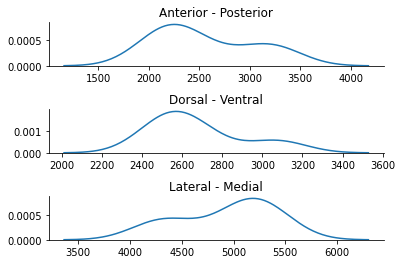

In [6]:
plot = pyswcloader.swc.plot_soma_distribution(data_path)

# load brain information

In [ ]:
# download denpendency files

# annotated allen template brain
urllib.request.urlretrieve('http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_10.nrrd',
                           'annotation_10.nrrd')

# allen template brain annotation
urllib.request.urlretrieve('http://api.brain-map.org/api/v2/structure_graph_download/1.json',
                           'info.json')

In [7]:
anno = pyswcloader.brain.read_nrrd('annotation_10.nrrd')

(1320, 800, 1140)


In [8]:
# stl_acro_dict = pyswcloader.brain.acronym_dict('info.json')
stl_acro_dict = pyswcloader.io.STL_ACRO_DICT

In [ ]:
# allen_brain_tree = pyswcloader.brain.allen_brain_tree('info.json')
allen_brain_tree = pyswcloader.io.ALLEN_BRAIN_TREE

# calculate projection information

In [ ]:
projection_length = pyswcloader.projection_batch.projection_length(data_path=data_path,
                                                                  annotation=anno,
                                                                  resolution=10,
                                                                  cores=4,)

In [ ]:
projection_length

In [ ]:
# change region ids to acronyms
projection_length.columns = [stl_acro_dict[item] for item in projection_length.columns]
projection_length

In [ ]:
terminal_count = pyswcloader.projection_batch.terminal_count(data_path = data_path,
                                                            annotation = anno,
                                                            resolution = 10,
                                                            cores = 4,)

In [ ]:
terminal_count.columns = [stl_acro_dict[item] for item in terminal_count.columns]

In [ ]:
terminal_count

# calculate morphology distance

In [ ]:
scores = pyswcloader.distance.morphology_matrix(data_path = data_path,
                                               cores = 4,)

In [ ]:
scores

# clustering

In [ ]:
info = pyswcloader.cluster.cluster(n_cluster = 3,
                                   method = 'hierarchy',
                                   feature = 'precomputed',
                                  matrix = scores)

In [ ]:
info

In [ ]:
# allen template brain whole-brain('root') mesh
urllib.request.urlretrieve('http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_meshes/997.obj',
                           '997.obj')

In [ ]:
# plot subtype 1

l = 1
canvas = pyswcloader.visualization.plot_neuron_3d(neuron_path = list(info[info.label==l]['file_path']), 
                                         region_path = '997.obj')
canvas